In [106]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [225]:
def getImg(image, imgRegions):
    
    letters = []
    for letter_bounding_box in imgRegions:
        x, y, w, h = letter_bounding_box
        letter_image = image[y - 2:y + h + 2, x - 2:x + w + 2]
        letters.append(letter_image)


    fig, axs = plt.subplots(1,len(letters), figsize=(15,5))


    for idx, ax in enumerate(axs):
        ax.set_title(idx)
        ax.axis('off')
        ax.imshow(letters[idx], cmap='gray')      

In [228]:
def split(image):
    
    plt.imshow(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0]
    
    
    letter_image_regions = []

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
            letter_image_regions.append((x, y, w, h))   
    
    i = 0
    while i != len(letter_image_regions):
        regions = []
        while letter_image_regions[i][0] != 0:
            regions.append(letter_image_regions[i])
            i+=1
        regions.sort(key=lambda x: x[0])
        getImg(gray, regions)
        i+=1     
        
    


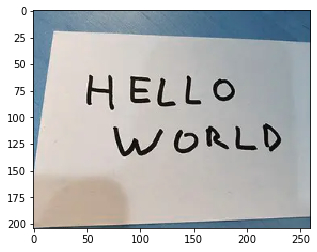

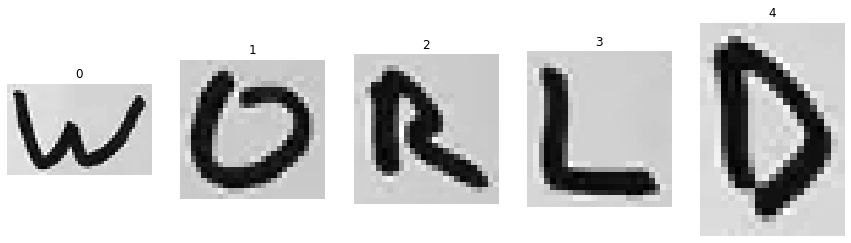

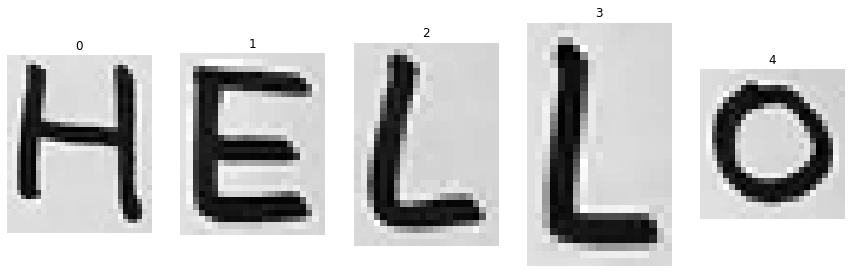

In [229]:
image = cv2.imread("image.png")
#image = cv2.imread("image2.png")
#image = cv2.imread("image3.png")
#image = cv2.imread("image4.png")
split(image)

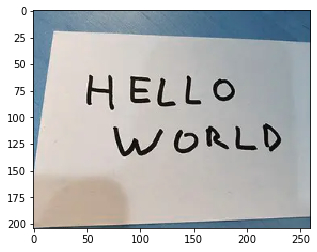

In [217]:
plt.imshow(image)